In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\airplane crash.csv", encoding="latin1")

In [109]:
print(df.columns)


Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'],
      dtype='object')


In [130]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("/", "_")


In [131]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [112]:
print(df.columns.tolist())


['date', 'time', 'location', 'operator', 'route', 'ac_type', 'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew', 'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground', 'summary']


In [132]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [133]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(0)


In [134]:
df[num_cols] = df[num_cols].fillna(0)

In [135]:
print(df.columns.tolist())


['date', 'time', 'location', 'operator', 'route', 'ac_type', 'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew', 'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground', 'summary', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27', 'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31', 'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39', 'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'year', 'month', 'day']


In [136]:
def extract_country(location):
    if pd.isna(location):
        return np.nan
    parts = str(location).split(",")
    return parts[-1].strip()

df["country"] = df["location"].apply(extract_country)

In [137]:
cat_cols = ["operator", "ac_type", "route", "registration"]

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")
    df[col] = df[col].str.strip()

In [138]:
df["survivors"] = df["aboard"] - df["fatalities"]

In [139]:
df["fatality_rate"] = df.apply(
    lambda row: row["fatalities"] / row["aboard"]
    if row["aboard"] > 0 else 0,
    axis=1
)

In [140]:
df["severity"] = df["fatality_rate"].apply(
    lambda x: "High" if x >= 0.5 else "Low"
)


In [141]:
df.drop_duplicates(inplace=True)

In [142]:
print("Final shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample cleaned data:\n")
print(df.head())

Final shape: (4998, 50)

Missing values:
 date                        0
time                     1512
location                    4
operator                    0
route                       0
ac_type                     0
registration                0
cn_ln                     668
aboard                      0
aboard_passangers           0
aboard_crew                 0
fatalities                  0
fatalities_passangers       0
fatalities_crew             0
ground                      0
summary                    64
unnamed:_16                 0
unnamed:_17                 0
unnamed:_18                 0
unnamed:_19                 0
unnamed:_20                 0
unnamed:_21                 0
unnamed:_22                 0
unnamed:_23                 0
unnamed:_24                 0
unnamed:_25                 0
unnamed:_26                 0
unnamed:_27                 0
unnamed:_28                 0
unnamed:_29                 0
unnamed:_30                 0
unnamed:_31                 

##### EDA

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("viridis")

df = pd.read_csv(r"C:\Users\Dell\Downloads\airplane crash.csv",encoding="latin1")
df.head()

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("/", "_")


In [151]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [152]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day


In [153]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Shape: (4998, 46)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4998 non-null   datetime64[ns]
 1   time                   3486 non-null   object        
 2   location               4994 non-null   object        
 3   operator               4988 non-null   object        
 4   route                  4221 non-null   object        
 5   ac_type                4983 non-null   object        
 6   registration           4724 non-null   object        
 7   cn_ln                  4330 non-null   object        
 8   aboard                 4980 non-null   float64       
 9   aboard_passangers      4769 non-null   float64       
 10  aboard_crew            4772 non-null   float64       
 11  fatalities             4990 non-null   float64       
 12  fatalities_passangers  4756 non-null 

In [154]:
df.describe(include="all")

,date,time,location,operator,route,ac_type,registration,cn_ln,aboard,aboard_passangers,...,unnamed:_36,unnamed:_37,unnamed:_38,unnamed:_39,unnamed:_40,unnamed:_41,unnamed:_42,year,month,day
count,4998,3486,4994,4988,4221,4983,4724,4330,4980.000000,4769.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1,4998.000000,4998.000000,4998.000000
unique,NaN,1060,4122,2264,3825,2463,4689,3818,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,15:00,"Moscow, Russia",Aeroflot,Training,Douglas DC-3,19,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Date,NaN,NaN,NaN
freq,NaN,38,17,255,93,333,3,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,1971-07-04 09:31:37.238895528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.195984,27.009017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.990796,6.700880,15.793717
min,1908-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1908.000000,1.000000,1.000000
25%,1951-06-15 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951.000000,4.000000,8.000000
50%,1970-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970.000000,7.000000,16.000000
75%,1992-06-06 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.000000,10.000000,23.000000
max,2023-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.000000,614.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.000000,12.000000,31.000000


In [155]:
print(df.columns.tolist())


['date', 'time', 'location', 'operator', 'route', 'ac_type', 'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew', 'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground', 'summary', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27', 'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31', 'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39', 'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'year', 'month', 'day']


In [156]:
df_clean = df.dropna(subset=["year"])


# EDA

#### 1. Crash Count Over the Years

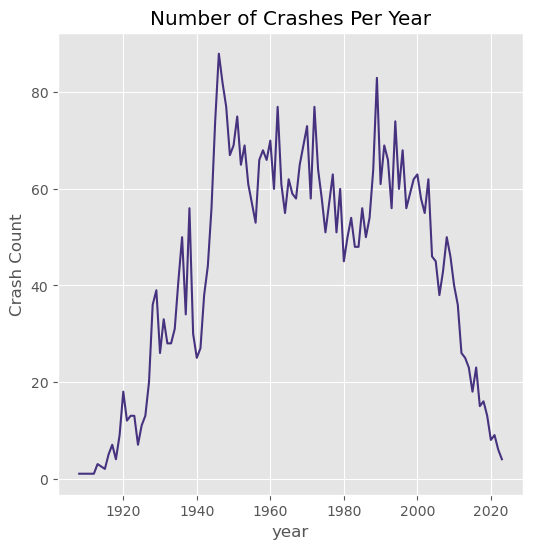

In [157]:
plt.figure(figsize=(6,6))
df.groupby("year").size().plot()
plt.title("Number of Crashes Per Year")
plt.xlabel("year")
plt.ylabel("Crash Count")
plt.show()

#### 2. Crashes Per Month

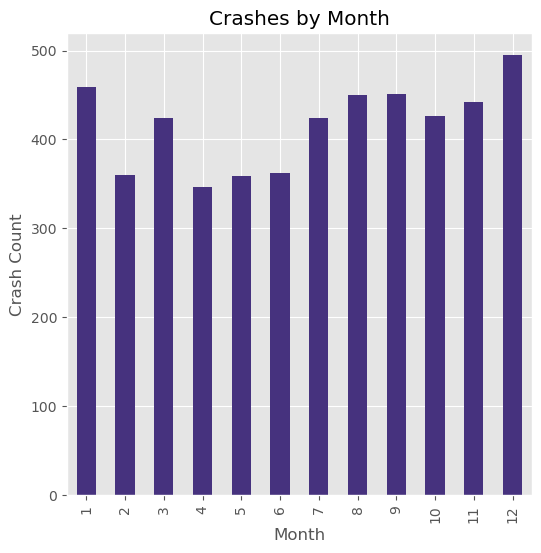

In [158]:
plt.figure(figsize=(6,6))
df.groupby("month").size().plot(kind="bar")
plt.title("Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Crash Count")
plt.show()

In [160]:
def extract_country(location):
    if pd.isna(location):
        return np.nan
    parts = str(location).split(",")
    return parts[-1].strip()

df["country"] = df["location"].apply(extract_country)

#### 3. Top 15 Countries with Most Plane Crashes

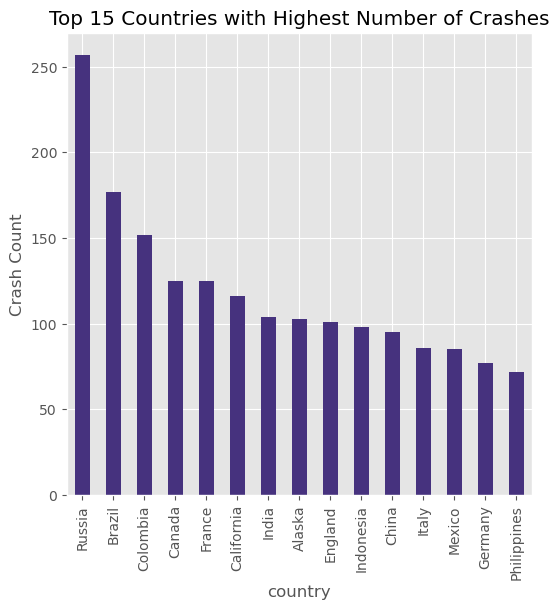

In [161]:
plt.figure(figsize=(6,6))
df["country"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Countries with Highest Number of Crashes")
plt.ylabel("Crash Count")
plt.show()

In [163]:
cat_cols = ["operator", "ac_type", "route", "registration"]

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")
    df[col] = df[col].str.strip()

#### 4. Top 15 Operators with Most Crashes

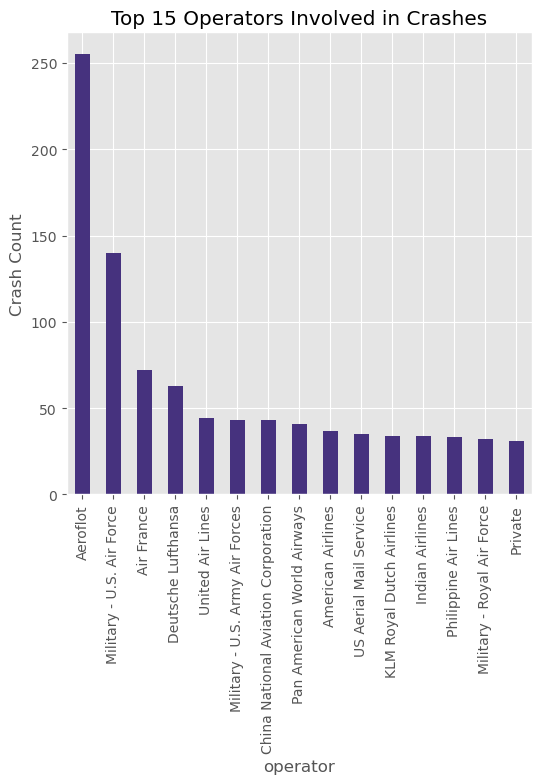

In [165]:
plt.figure(figsize=(6,6))
df["operator"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Operators Involved in Crashes")
plt.ylabel("Crash Count")
plt.show()

#### 5. Top 15 Aircraft Types with Most Crashes

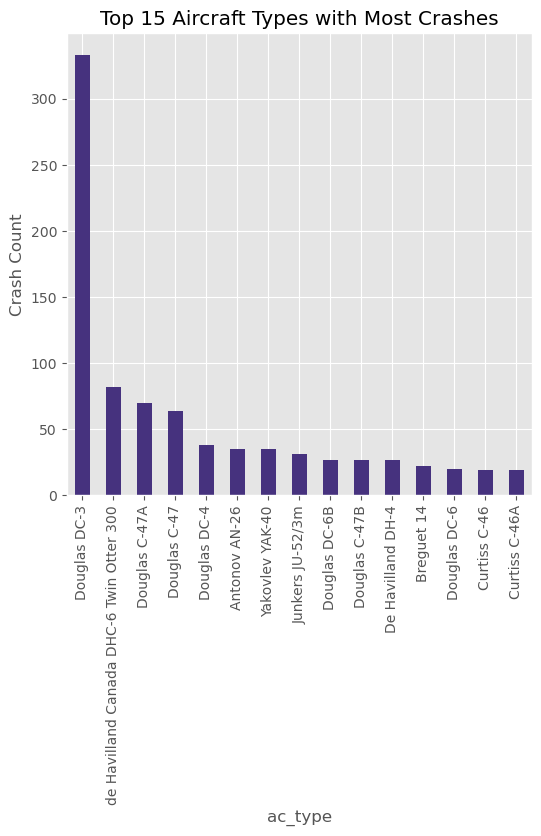

In [167]:
plt.figure(figsize=(6,6))
df["ac_type"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Aircraft Types with Most Crashes")
plt.ylabel("Crash Count")
plt.show()

#### 6. Fatalities Trend Over Time

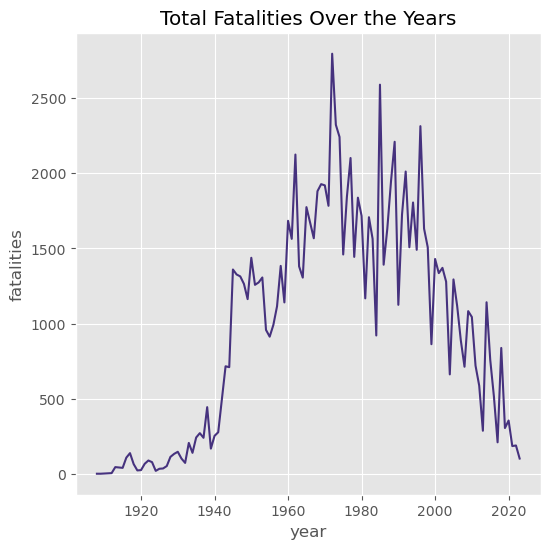

In [170]:
plt.figure(figsize=(6,6))
df.groupby("year")["fatalities"].sum().plot()
plt.title("Total Fatalities Over the Years")
plt.ylabel("fatalities")
plt.show()

#### 7. Survivors vs Fatalities Comparison

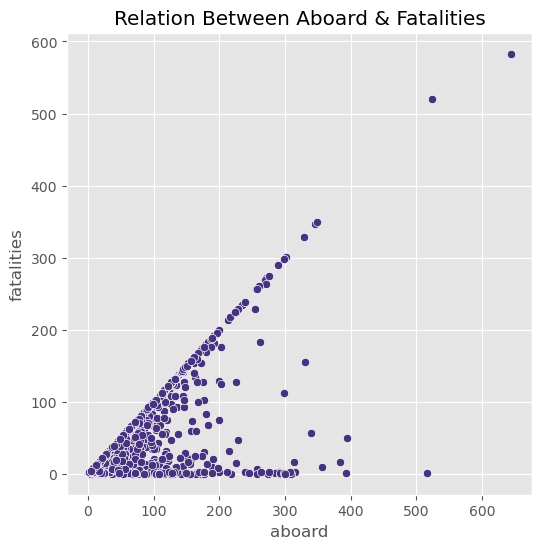

In [171]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df["aboard"], y=df["fatalities"])
plt.title("Relation Between Aboard & Fatalities")
plt.xlabel("aboard")
plt.ylabel("fatalities")
plt.show()

In [174]:
df["fatality_rate"] = df.apply(
    lambda row: row["fatalities"] / row["aboard"]
    if row["aboard"] > 0 else 0,
    axis=1
)

In [175]:
df["severity"] = df["fatality_rate"].apply(
    lambda x: "High" if x >= 0.5 else "Low"
)


#### 8. Severity Distribution (High vs Low)

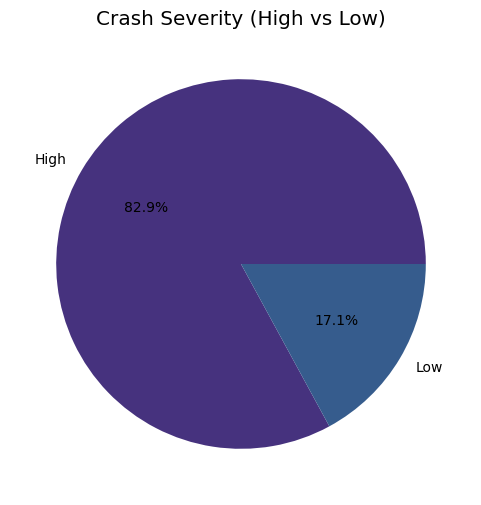

In [176]:
plt.figure(figsize=(6,6))
df["severity"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Crash Severity (High vs Low)")
plt.ylabel("")
plt.show()

#### 9. Crashes by Country (Heatmap-like bar visualization)

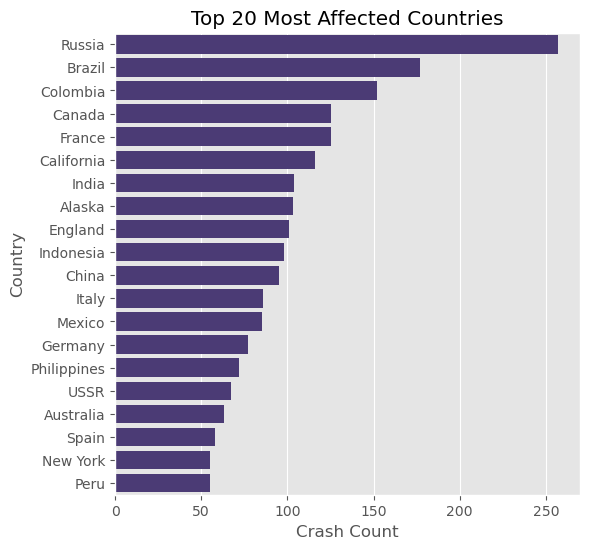

In [177]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, y="country", order=df["country"].value_counts().head(20).index)
plt.title("Top 20 Most Affected Countries")
plt.xlabel("Crash Count")
plt.ylabel("Country")
plt.show()

In [180]:
df["survivors"] = df["aboard"] - df["fatalities"]

#### 10. Correlation Heatmap

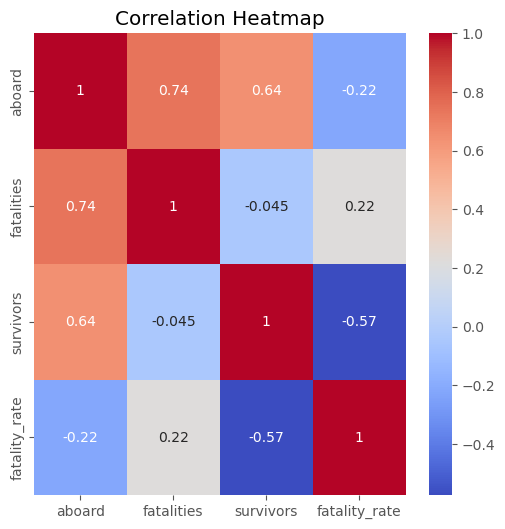

In [181]:
plt.figure(figsize=(6,6))
sns.heatmap(df[["aboard","fatalities","survivors","fatality_rate"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### 11. Crashes by Decade (Optional but impressive)

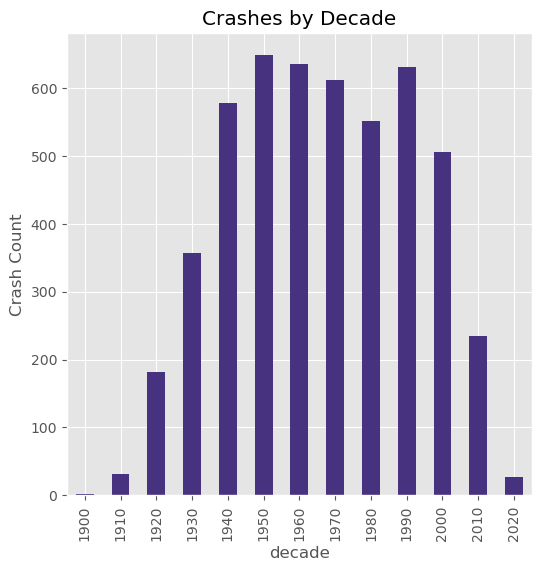

In [182]:
df["decade"] = (df["year"] // 10) * 10

plt.figure(figsize=(6,6))
df.groupby("decade").size().plot(kind="bar")
plt.title("Crashes by Decade")
plt.ylabel("Crash Count")
plt.show()

# Feature engineering

In [184]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year 

In [185]:
print(df.columns)

Index(['date', 'time', 'location', 'operator', 'route', 'ac_type',
       'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew',
       'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground',
       'summary', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19',
       'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27',
       'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31',
       'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35',
       'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39',
       'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'year', 'month', 'day',
       'country', 'fatality_rate', 'severity', 'survivors', 'decade',
       'day_of_week'],
      dtype='object')


In [188]:
df['fatality_rate'] = df['fatalities_passangers'] / df['aboard']

In [189]:
print(df.columns.tolist())


['date', 'time', 'location', 'operator', 'route', 'ac_type', 'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew', 'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground', 'summary', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19', 'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23', 'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27', 'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31', 'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39', 'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'year', 'month', 'day', 'country', 'fatality_rate', 'severity', 'survivors', 'decade', 'day_of_week']


In [190]:
df['severity'] = pd.cut(df['fatality_rate'],
                        bins=[0, 0.25, 0.75, 1],
                        labels=['Low', 'Medium', 'High'])


In [192]:
df['manufacturer'] = df['ac_type'].str.split().str[0]


In [193]:
df.describe()


,date,aboard,aboard_passangers,aboard_crew,fatalities,fatalities_passangers,fatalities_crew,ground,unnamed:_16,unnamed:_17,...,unnamed:_39,unnamed:_40,unnamed:_41,year,month,day,fatality_rate,survivors,decade,day_of_week
count,4998,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000,0.0,0.0,...,0.0,0.0,0.0,4998.000000,4998.000000,4998.000000,4749.000000,4980.000000,4998.000000,4998.000000
mean,1971-07-04 09:31:37.238895528,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128,NaN,NaN,...,NaN,NaN,NaN,1970.990796,6.700880,15.793717,inf,8.794177,1966.400560,2.937575
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1908.000000,1.000000,1.000000,0.000000,0.000000,1900.000000,0.000000
25%,1951-06-15 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1951.000000,4.000000,8.000000,0.062500,0.000000,1950.000000,1.000000
50%,1970-11-27 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1970.000000,7.000000,16.000000,0.636364,0.000000,1970.000000,3.000000
75%,1992-06-06 18:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,1992.000000,10.000000,23.000000,0.833333,3.000000,1990.000000,5.000000
max,2023-11-01 00:00:00,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000,NaN,NaN,...,NaN,NaN,NaN,2023.000000,12.000000,31.000000,inf,516.000000,2020.000000,6.000000
std,NaN,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273,NaN,NaN,...,NaN,NaN,NaN,24.796492,3.531153,8.805100,NaN,30.652501,25.038478,1.941846


In [195]:
df.groupby('manufacturer')['fatalities'].sum().sort_values(ascending=False)


manufacturer
Boeing       20656.0
Douglas      16644.0
Lockheed      7796.0
McDonnell     7097.0
Antonov       6577.0
              ...   
Rochrbach        0.0
C-46             0.0
Sepecat          0.0
F-86             0.0
Wapiti           0.0
Name: fatalities, Length: 308, dtype: float64

In [197]:
df.groupby('operator')['fatalities'].sum().sort_values(ascending=False).head(10)


operator
Aeroflot                           8858.0
Military - U.S. Air Force          3356.0
Air France                         1757.0
American Airlines                  1422.0
Pan American World Airways         1303.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1019.0
AVIANCA                             941.0
Turkish Airlines (THY)              890.0
Indian Airlines                     860.0
Name: fatalities, dtype: float64

In [198]:
df.groupby('country').size().sort_values(ascending=False).head(10)


country
Russia        257
Brazil        177
Colombia      152
France        125
Canada        125
California    116
India         104
Alaska        103
England       101
Indonesia      98
dtype: int64

<Axes: xlabel='year'>

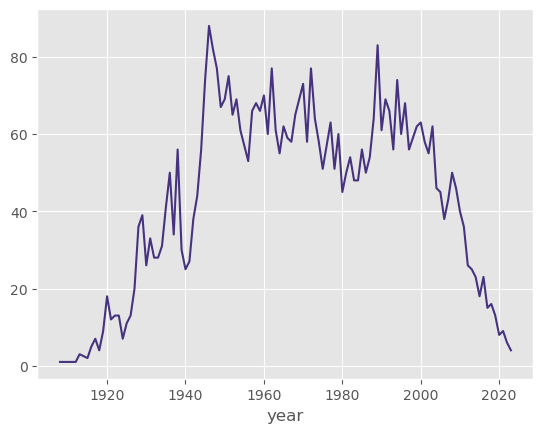

In [199]:
df.groupby('year').size().plot()


In [200]:
df.groupby('manufacturer')['fatalities_passangers'].sum().sort_values(ascending=False)
df.groupby('country').size().sort_values(ascending=False)


country
Russia                                 257
Brazil                                 177
Colombia                               152
France                                 125
Canada                                 125
                                      ... 
Manmar                                   1
Manitoba                                 1
Malta International Airport              1
Malaya                                   1
off the Philippine island of Elalat      1
Length: 513, dtype: int64

### By Aircraft Manufacturer

In [202]:
df.groupby('manufacturer')['fatalities'].sum().sort_values(ascending=False)


manufacturer
Boeing       20656.0
Douglas      16644.0
Lockheed      7796.0
McDonnell     7097.0
Antonov       6577.0
              ...   
Rochrbach        0.0
C-46             0.0
Sepecat          0.0
F-86             0.0
Wapiti           0.0
Name: fatalities, Length: 308, dtype: float64

### By Operator (Airline)

In [203]:
df.groupby('operator')['fatalities'].sum().sort_values(ascending=False).head(10)


operator
Aeroflot                           8858.0
Military - U.S. Air Force          3356.0
Air France                         1757.0
American Airlines                  1422.0
Pan American World Airways         1303.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1019.0
AVIANCA                             941.0
Turkish Airlines (THY)              890.0
Indian Airlines                     860.0
Name: fatalities, dtype: float64

### By Country

In [205]:
df.groupby('country').size().sort_values(ascending=False).head(10)


country
Russia        257
Brazil        177
Colombia      152
France        125
Canada        125
California    116
India         104
Alaska        103
England       101
Indonesia      98
dtype: int64

#### Crash Trends Over Time

### Crashes per Year

<Axes: xlabel='year'>

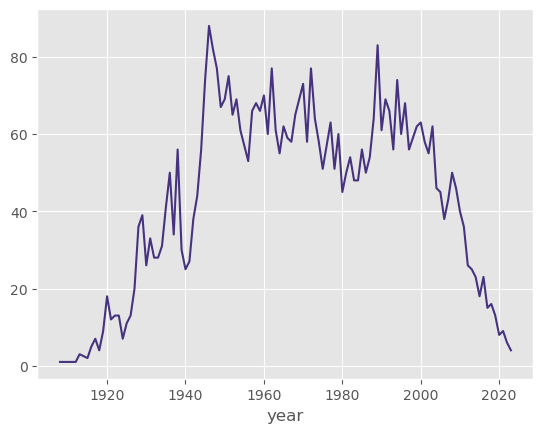

In [206]:
df.groupby('year').size().plot()

### Crashes per Decade

In [207]:
df['decade'] = (df['year'] // 10) * 10
df.groupby('decade').size()

decade
1900      2
1910     31
1920    182
1930    357
1940    578
1950    649
1960    636
1970    612
1980    552
1990    631
2000    506
2010    235
2020     27
dtype: int64

## Survivability Analysis

### Average Survivability by Year

In [209]:
df['survival_rate'] = (df['aboard'] - df['fatalities']) / df['aboard']
df.groupby('year')['survival_rate'].mean()

year
1908    0.500000
1909    0.000000
1912    0.000000
1913    0.100000
1915    0.243902
          ...   
2019    0.137647
2020    0.257503
2021    0.172123
2022    0.259690
2023    0.000000
Name: survival_rate, Length: 113, dtype: float64

### Survivability by Operator

In [211]:
df.groupby('operator')['survival_rate'].mean().sort_values(ascending=False).head(10)

operator
Western Helicopter                1.0
Transcontinental &Western Air     1.0
LATAM                             1.0
Centurian Air Cargo               1.0
KLM Royal Duch Airlines           1.0
Emirates                          1.0
Ararat Avia                       1.0
American International Airways    1.0
Allied Air                        1.0
Reeve Aleutian Airways            1.0
Name: survival_rate, dtype: float64

### Survivability by Aircraft Type

In [213]:
df.groupby('ac_type')['survival_rate'].mean()

ac_type
A-7D Corsair                          0.090909
AAC-1 Toucan                          0.148148
AEGK                                  0.000000
AT L98 Carvair                        0.333333
ATR 42-300                            0.000000
                                        ...   
de Havilland Dragon 1                 0.500000
de Hvilland 89A Dragon Rapide         0.000000
de havilland 89 Dragon Rapide         0.000000
de havilland Canada Twin Otter 200    0.153846
deHavilland DH-86                     0.000000
Name: survival_rate, Length: 2456, dtype: float64

### Correlation Analysis

In [214]:
df[['aboard', 'fatalities', 'survival_rate']].corr()

,aboard,fatalities,survival_rate
aboard,1.000000,0.740119,0.220891
fatalities,0.740119,1.000000,-0.217769
survival_rate,0.220891,-0.217769,1.000000


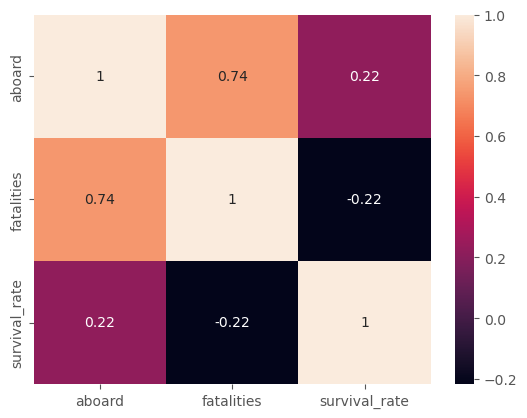

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['aboard', 'fatalities', 'survival_rate']].corr(), annot=True)
plt.show()


In [219]:
df.columns


Index(['date', 'time', 'location', 'operator', 'route', 'ac_type',
       'registration', 'cn_ln', 'aboard', 'aboard_passangers', 'aboard_crew',
       'fatalities', 'fatalities_passangers', 'fatalities_crew', 'ground',
       'summary', 'unnamed:_16', 'unnamed:_17', 'unnamed:_18', 'unnamed:_19',
       'unnamed:_20', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25', 'unnamed:_26', 'unnamed:_27',
       'unnamed:_28', 'unnamed:_29', 'unnamed:_30', 'unnamed:_31',
       'unnamed:_32', 'unnamed:_33', 'unnamed:_34', 'unnamed:_35',
       'unnamed:_36', 'unnamed:_37', 'unnamed:_38', 'unnamed:_39',
       'unnamed:_40', 'unnamed:_41', 'unnamed:_42', 'year', 'month', 'day',
       'country', 'fatality_rate', 'severity', 'survivors', 'decade',
       'day_of_week', 'manufacturer', 'survival_rate'],
      dtype='object')

In [220]:
df["manufacturer"] = df["ac_type"].str.split().str[0]


### Statistical Tests

#### ANOVA Test — Do different aircraft manufacturers have different average fatalities?

In [221]:
groups = [g['fatalities'].dropna() 
          for _, g in df.groupby('manufacturer') 
          if g['fatalities'].dropna().shape[0] >= 2]


In [222]:
from scipy.stats import f_oneway
f_oneway(*groups)


F_onewayResult(statistic=8.40786746215877, pvalue=8.108029066408352e-144)

#### Chi-square Test — Are country and crash severity related?

In [223]:
pd.crosstab(df['country'], df['severity'])


severity,Low,Medium,High
country,,,
110 miles West of Ireland,0,0,1
175 miles off the Egyptian coast,0,0,1
325 miles east of Wake Island,0,0,1
AK,0,0,1
Aegean Sea,0,1,0
...,...,...,...
Zimbabwe),1,0,0
bulgaria,0,0,1
off Australia,0,0,1


In [224]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['country'], df['severity']))


Chi2ContingencyResult(statistic=984.9867457175957, pvalue=0.005148716031717962, dof=874, expected_freq=array([[0.1372549 , 0.38893366, 0.47381144],
       [0.1372549 , 0.38893366, 0.47381144],
       [0.1372549 , 0.38893366, 0.47381144],
       ...,
       [0.1372549 , 0.38893366, 0.47381144],
       [0.1372549 , 0.38893366, 0.47381144],
       [0.1372549 , 0.38893366, 0.47381144]]))